## Final Project Submission

Please fill out:
* Student name: CYNTHIA WANJIRA CHIURI
* Student pace: Part time
* Scheduled project review date/time: 16th April 2023
* Instructor name: Noah Kandie 
* Blog post URL: https://datascience942.wordpress.com/2023/04/16/using-exploratory-data-analysis-to-generate-insights-for-a-technology-business/


## BUSINESS UNDERSTANDING

In [ ]:
#Business Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun.
They have decided to create a new movie studio, but they don’t know anything about creating movies.
You are charged with exploring what types of films are currently doing the best at the box office.
You must then translate those findings into actionable insights,
that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## DATA PROCESSING

1.Loading data 

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import sqlite3

%matplotlib inline

In [2]:
#Loading the gross csv
gross = pd.read_csv('data/bom.movie_gross.csv', index_col = 0)

In [3]:
#Loading the movie csv
movie = pd.read_csv('data/tmdb.movies.csv' , index_col = 0)

In [4]:
#Loading the budgets csv
budgets = pd.read_csv('data/tn.movie_budgets.csv' , index_col = 0)

In [5]:
conn = sqlite3.connect('data/im.db')

basics = pd.read_sql_query('SELECT* from movie_basics', conn)
ratings = pd.read_sql_query('SELECT* from movie_ratings', conn)

basics.to_csv('movie_basics.csv', index=False)
ratings.to_csv('movie_ratings.csv', index=False)

conn.close()

2. Inspecting the data - Movie_basics

In [7]:
#To display the first few rows
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#To display the last few rows
basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [9]:
#To get the information summary on the table
# we see some of the columns have null entries, data types of the columns.

basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
#Check the number of rows and columns
basics.shape

#There are 6 columns and 146144 rows

(146144, 6)

In [11]:
#Gettings a summary of the numeric columns
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [12]:
#To check null values
basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [13]:
# To check Duplicates
basics.duplicated().sum()

0

In [14]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
basics_copy = basics.copy()

3.Inspecting data - Move Rating

In [15]:
#To display the first few rows
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
#To display the last few rows
ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [17]:
#To get the information summary on the table
# we see some of the columns have null entries, data types of the columns.

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
#Check the number of rows and columns
#There are 3 columns and 73856 rows
ratings.shape

(73856, 3)

In [19]:
#Gettings a summary of the numeric columns
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [20]:
#To check null values
ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [21]:
# To check Duplicates
ratings.duplicated().sum()

0

In [22]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
ratings_copy = ratings.copy()

3. Inspecting gross

In [23]:
#To display the first few rows
gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
#To display the last few rows
gross.tail()

,studio,domestic_gross,foreign_gross,year
title,,,,
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018
The Swan,Synergetic,2400.0,NaN,2018
An Actor Prepares,Grav.,1700.0,NaN,2018


In [25]:
#To get the information summary on the table
# we see some of the columns have null entries, data types of the columns.

gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [26]:
#Check the number of rows and columns
#There are 4 columns and 3387 rows
gross.shape

(3387, 4)

In [27]:
#Gettings a summary of the numeric columns
gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [28]:
#To check null values
gross.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [29]:
# To check Duplicates
gross.duplicated().sum()

11

In [30]:
# sorting the data in ascending order inorder to test for outliers.
gross_year = gross.sort_values(by ='year',ascending = True)

In [32]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
gross_copy = gross.copy()

4. Inspecting Movie

In [33]:
#To display the first few rows
movie.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [34]:
#To display the last few rows
movie.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [35]:
#To get the information summary on the table
# we see some of the columns have null entries, data types of the columns.

movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
#Check the number of rows and columns
#There are 9 columns and 26517
movie.shape

In [36]:
#Gettings a summary of the numeric columns
movie.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [37]:
#To check null values
movie.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [38]:
# To check Duplicates
movie.duplicated().sum()

1020

In [39]:
# sorting the data in ascending order inorder to test for outliers.
movie_id = movie.sort_values(by ='id',ascending = True)

In [43]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
movie_copy = movie.copy()

5. Inspecting budgets

In [42]:
#To display the first few rows
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [44]:
#To display the last few rows
budgets.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [45]:
#To get the information summary on the table
# we see some of the columns have null entries, data types of the columns.

budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [46]:
#Check the number of rows and columns
#There are 5 columns and 5782 rows
budgets.shape

(5782, 5)

In [47]:
#Gettings a summary of the numeric columns
budgets.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [48]:
#To check null values
budgets.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [49]:
# To check Duplicates
budgets.duplicated().sum()

0

In [50]:
# sorting the data in ascending order inorder to test for outliers.
budget_production_budget = budgets.sort_values(by ='production_budget',ascending = True)

In [51]:
print(budgets.columns)

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [52]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
budgets_copy = budgets.copy()

DATA ISSUES

1.Datasets in Separate dataframes

2.Missings Data

4.Duplicates

## DATA CLEANING

In [53]:
# joining basics_copy and ratings_copy so that it retains only the movies/series that have a rating and votecount
new_df = basics_copy.merge(ratings_copy, on='movie_id',how='right')

new_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [54]:
#To get a summary of the combined datasets
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [55]:
#Notice the columns have been combined and number of rows from the ratings have remained constant
new_df.shape

(73856, 8)

In [56]:
#Renaming the column primary_title to title to allow for us to work with a aprimary key since they have similar data.
new_df.rename(columns = {'primary_title':'title'}, inplace = True)

In [57]:
#confirming the renaming 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   title            73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [58]:
# Joining the combined dataset and the gross copy
combined_df = new_df.merge(gross_copy, on="title")

combined_df.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,42400000,2014
1,tt1171222,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,FoxS,21600000.0,887000,2013
2,tt1181840,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",7.0,5494,Shout!,NaN,3400000,2014
3,tt1210166,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,34600000,2011
4,tt1212419,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,72500000,2010


In [59]:
# Working with the combined data onwards

#To display the last few rows from the table
combined_df.tail()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3022,tt3399916,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",6.3,4185,Magn.,5200.0,NaN,2015
3023,tt3616916,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",6.7,28167,Magn.,177000.0,NaN,2016
3024,tt3748512,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,7.4,4977,Cohen,260000.0,NaN,2015
3025,tt7008872,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",7.0,18768,Focus,6800000.0,5000000,2018
3026,tt7048622,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",7.7,11168,Cohen,1000000.0,NaN,2018


In [60]:
#To check the summary of the table
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [61]:
#To check the number of rows and columns
combined_df.shape

(3027, 12)

In [62]:
# To check the summary of the numeric columns
combined_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3027.000000,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,2.466955,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [63]:
#Checking duplicated data
# no duplicates,combining the datasets automatically eliminated the duplicated data from the individual dataset inspection.
combined_df.duplicated().sum()

0

In [64]:
#To check null values
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [65]:
# drop any rows with missing values in the 'runtime_minutes' or 'genres' columns
combined_df = combined_df.dropna(subset=['runtime_minutes' ,'genres', 'domestic_gross'])

In [66]:
#To check null values
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
studio                1
domestic_gross        0
foreign_gross      1186
year                  0
dtype: int64

In [73]:
# Check the data type of the 'foreign_gross' column
print(combined_df['foreign_gross'].dtype)

float64


In [78]:
# Convert the 'foreign_gross' column to string type
combined_df['foreign_gross'] = combined_df['foreign_gross'].astype(str)

# Use the .str accessor on the 'foreign_gross' column
combined_df['foreign_gross'] = combined_df['foreign_gross'].str.replace(',', '').astype(float)

In [79]:
# replace missing values in the 'foreign_gross' column with the median
median_foreign_gross = combined_df['foreign_gross'].median()
combined_df['foreign_gross'] = combined_df['foreign_gross'].fillna(median_foreign_gross)

In [80]:
#To check for the data type
print(type("combined_df"))

<class 'str'>


In [81]:
#To check null values
combined_df.isna().sum()

movie_id           0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             1
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [82]:
# select only the columns that we need for analysis
selected_df = combined_df[['title', 'genres', 'averagerating', 'domestic_gross', 'foreign_gross', 'year']]

selected_df.head()

,title,genres,averagerating,domestic_gross,foreign_gross,year
0,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,18800000.0,42400000.0,2014
1,Baggage Claim,Comedy,5.1,21600000.0,887000.0,2013
3,Moneyball,"Biography,Drama,Sport",7.6,75600000.0,34600000.0,2011
4,Hereafter,"Drama,Fantasy,Romance",6.5,32700000.0,72500000.0,2010
5,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",7.4,209400000.0,485300000.0,2011


In [86]:
#To check the summary of the table
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953 entries, 0 to 3026
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2953 non-null   object 
 1   genres          2953 non-null   object 
 2   averagerating   2953 non-null   float64
 3   domestic_gross  2953 non-null   float64
 4   foreign_gross   2953 non-null   float64
 5   year            2953 non-null   int64  
 6   total_gross     2953 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 184.6+ KB


In [89]:
#To check the summary of the table
selected_df.head()

,title,genres,averagerating,domestic_gross,foreign_gross,year,total_gross
0,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,18800000.0,42400000.0,2014,61200000.0
1,Baggage Claim,Comedy,5.1,21600000.0,887000.0,2013,22487000.0
3,Moneyball,"Biography,Drama,Sport",7.6,75600000.0,34600000.0,2011,110200000.0
4,Hereafter,"Drama,Fantasy,Romance",6.5,32700000.0,72500000.0,2010,105200000.0
5,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",7.4,209400000.0,485300000.0,2011,694700000.0


In [88]:
# combining our domestic_gross and foreign_gross columns to have one column for total_column
selected_df.loc[:,'total_gross'] = selected_df['foreign_gross'] + selected_df['domestic_gross']

C:\Users\c.chiuri\AppData\Local\Temp\ipykernel_18692\77355260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.loc[:,'total_gross'] = selected_df['foreign_gross'] + selected_df['domestic_gross']


In [91]:
# select only the columns that we need for analysis
final_df = selected_df[['title', 'genres', 'averagerating', 'total_gross', 'year']]

final_df.head()

,title,genres,averagerating,total_gross,year
0,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,61200000.0,2014
1,Baggage Claim,Comedy,5.1,22487000.0,2013
3,Moneyball,"Biography,Drama,Sport",7.6,110200000.0,2011
4,Hereafter,"Drama,Fantasy,Romance",6.5,105200000.0,2010
5,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",7.4,694700000.0,2011


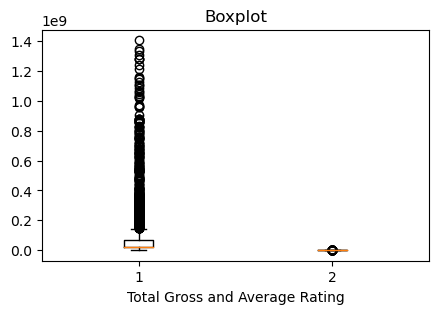

In [96]:
# inspecting for outliers
fig = plt.figure(figsize =(5, 3))
# create a boxplot of the 'total_gross' and'averagerating column
plt.boxplot([final_df['total_gross'], final_df['averagerating']])

# set the title and labels
plt.title('Boxplot')
plt.xlabel('Total Gross and Average Rating')
plt.show()

All outliers in the dataframe will be retained .

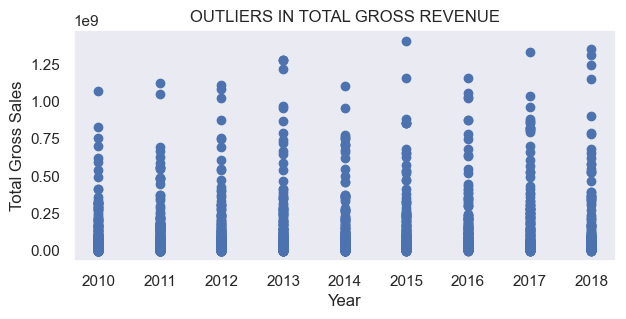

In [173]:
fig, ax = plt.subplots(figsize =(7, 3))

ax.scatter(final_df["year"],final_df["total_gross"])
ax.set_title('OUTLIERS IN TOTAL GROSS REVENUE')
ax.set_xlabel('Year')
ax.set_ylabel('Total Gross Sales')

plt.show()

### DATA ANALYSIS

My aim for this study is to answer these three questions
1.Which is the most common genre 
2.which genre has the highest number of return
3.Is the highest paying genre correlated to its rating


In [108]:
# Create a new dataframe with the count of movies per genre
genres_counts = final_df['genres'].value_counts().reset_index(name='count').rename(columns={'index': 'title'})
print(genres_counts)

                          title  count
0                         Drama    301
1                  Comedy,Drama    132
2          Comedy,Drama,Romance    132
3                 Drama,Romance    111
4                   Documentary    104
..                          ...    ...
313    Action,Biography,History      1
314             Crime,Drama,War      1
315  Biography,History,Thriller      1
316   Documentary,Drama,Romance      1
317    Adventure,Comedy,Western      1

[318 rows x 2 columns]


In [186]:
# Define a list of genres you want to keep
genres_to_keep = ['Drama', 'Comedy,Drama','Comedy,Drama,Romance','Drama,Romance','Documentary']

# Use boolean indexing to select only the rows with the desired genres
genres_filtered = genres_counts[genres_counts['title'].isin(genres_to_keep)]
print(genres_filtered)

                  title  count
0                 Drama    301
1          Comedy,Drama    132
2  Comedy,Drama,Romance    132
3         Drama,Romance    111
4           Documentary    104


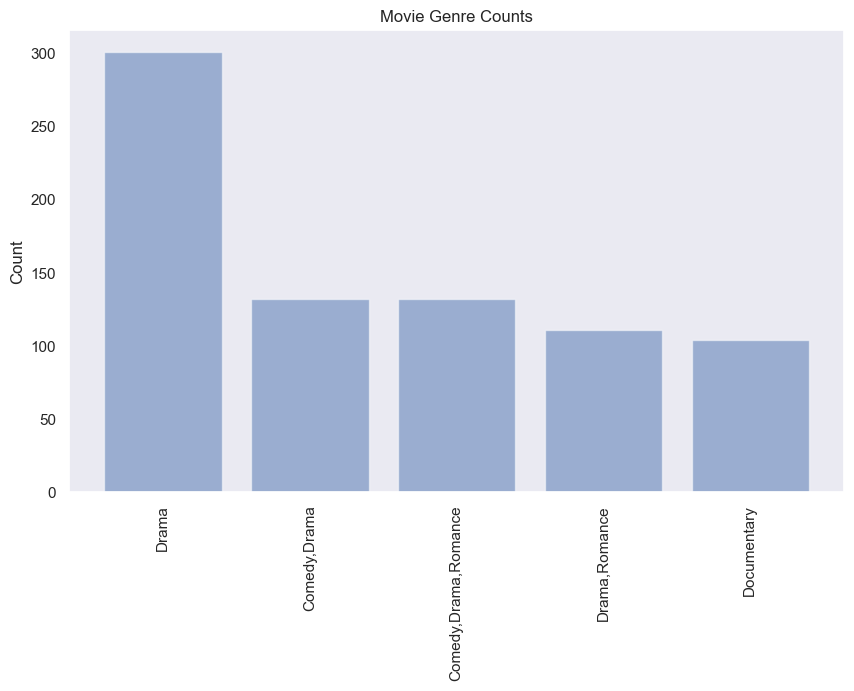

In [191]:
# create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
genres = genres_filtered['title']
counts = genres_filtered['count']
y_pos = np.arange(len(genres))

ax.bar(y_pos, counts, align='center', alpha=0.5)
ax.set_xticks(y_pos)
ax.set_xticklabels(genres, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Movie Genre Counts')

plt.show()

Its evident from the graph above that Drama is the most common Genre,this gives us more insights on which show Microsoft should focus on more.

In [118]:
#Chceking the number of unique genres in the dataframe
len(final_df['genres'].unique())

318

In [121]:
#Displaying the first 10 
genres_counts.head(10)

,title,count
0,Drama,301
1,"Comedy,Drama",132
2,"Comedy,Drama,Romance",132
3,"Drama,Romance",111
4,Documentary,104
5,Comedy,92
6,"Adventure,Animation,Comedy",75
7,"Comedy,Romance",71
8,"Drama,Thriller",54
9,"Action,Adventure,Sci-Fi",47


In [123]:
# tpe of created dataframe where genres are stored
type(genres_counts)

pandas.core.frame.DataFrame

In [124]:
# Saving the cleaned data into a csv file
final_df.to_csv('final_df.csv',index=False)

In [174]:
# Veryfing storage of data by reading the file
final_df = pd.read_csv('final_df.csv')

In [175]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2953 non-null   object 
 1   genres         2953 non-null   object 
 2   averagerating  2953 non-null   float64
 3   total_gross    2953 non-null   float64
 4   year           2953 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 115.5+ KB


## DATA EXPLORATION

In [ ]:
-What are the top popular genres by rating ?

-Does the number of revenue and ratings correlate ?

-What are the correlations of the ratings and other attributes ?

In [227]:
#Arranging my data in descending order from the highest rating to the lowest rating
by_rating = final_df.sort_values(by='averagerating',ascending = False)

In [230]:
#Creating a variable that contains column genres,averageratings and titles as sorted
genres_orderby_rating = by_rating.loc[:,['genres','averagerating','title']]
genres_orderby_rating.head()

,genres,averagerating,title
1003,Documentary,9.2,The Wall
187,Adventure,9.2,The Runaways
1319,Drama,9.1,Tomorrow
119,Documentary,9.0,The Way
1273,"Comedy,Documentary,Drama",8.9,The Mayor


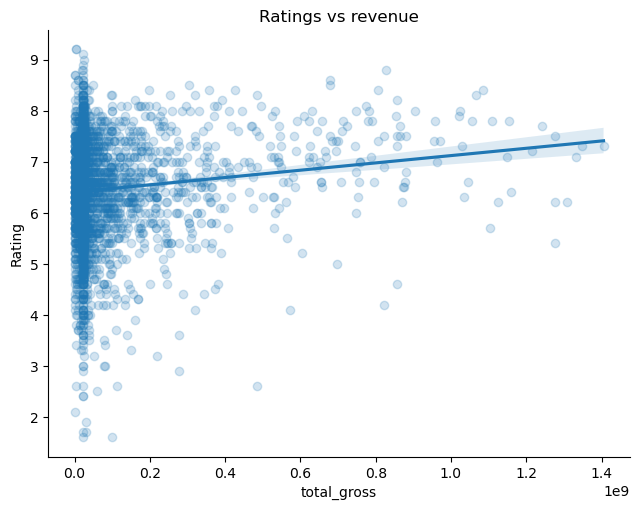

In [153]:
# Plot scatterplot of retweet vs favorite count
sb.lmplot(x="total_gross", 
           y="averagerating", 
           data= final_df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Ratings vs revenue')
plt.xlabel('total_gross')
plt.ylabel('Rating');

In [154]:
# correlation 
cor1 =final_df[["averagerating","total_gross"]].corr(method ='pearson')
print (cor1)

               averagerating  total_gross
averagerating          1.000        0.123
total_gross            0.123        1.000


The is a positive correlation between domestic_gross and the rating of a movie though its weak 0.12(rounded) meaning the investemnt put in the production of a movie has a proportion to the ratings

CORRELATIONS

In [164]:
#Checking the correlation of genre and domestic gross which could affect the type of genre to be produced
final_df[final_df.columns[1:]].corr()['averagerating'][:].sort_values(ascending=False).to_frame()

#df[df.columns[1:]].corr()['median_house_value'][:].sort_values(ascending=False).to_frame()

,averagerating
averagerating,1.000000
total_gross,0.123000
year,0.034451


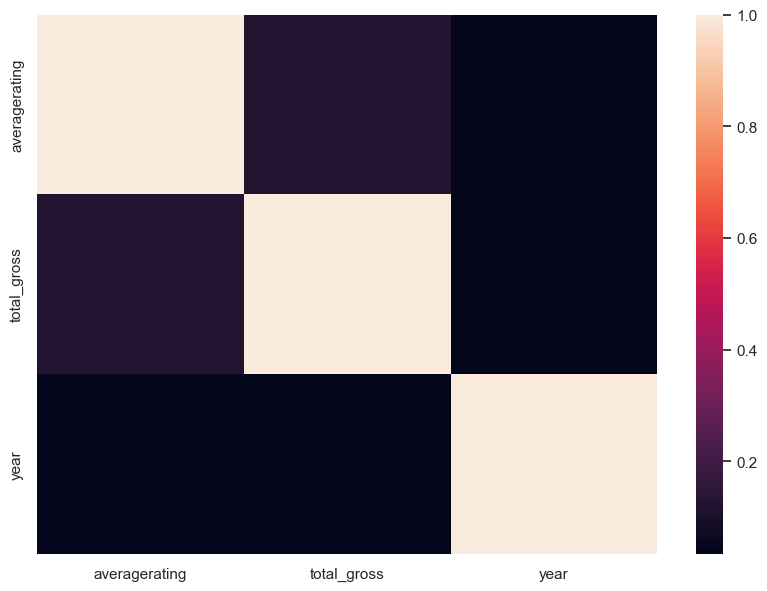

In [167]:
# Creating a correlation heatmap 
plt.figure(figsize=(10,7))
sb.set_theme(style="dark")
corr = final_df.corr()
heatmap = sb.heatmap(corr, annot=False, fmt='.1g')

The light shades show high correlation betwen the elements while dark shades show low correlation between the elements.Eg the averagerating has a weak positive correlation with total_gross meaning that a high rating indicates a descent gross return.

Conclusions

We have drawn many interesting inferences from the dataset,here's a summary of the few of them:

The most genre type is drama with the least as war,

The amount of total Gross does affect the rating of the movie,

Some Genre Combinations are more relatable to each other unlike others.

Recommendations

The studios that should be invested in should be either The mayor,Tomorrow or The way

The company should consider starting with the production of drama genre movies.